### Class 1

1. Groupby
    * Interactions
    * Simple Model
2. Boxplots
    * Quantiles
    * Whiskers
3. Histograms and Standard Deviation

In [1]:
#!pip install jupyter_contrib_nbextensions

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Explore the Titanic Data

In [3]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Contingency Tables as simple models

In [4]:
titanicSmall = titanic[['pclass','sex', 'survived']]
SurvByClassSex = titanicSmall.groupby(['pclass','sex'])
SurvProb = SurvByClassSex.mean()
SurvProb

survived
pclass sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

### Task 1

We can regard this simple counting exercise as a "predictive model" where we "predict" the outcome based on bucketing the data and "classify" the Survival status by $S=1$, if $P_S(sex,pclass) \geq 0.5$ and $0$ otherwise.

1. Compute the **confusion matrix**, which is simply a $2x2$ contingency table of the predicted versus the actual outcomes. (Hint: Look at `pd.crosstab()`)
2. (**MC**) Compute the overall accuracy of this model in two ways: (i) directly from the confusion matrix and (ii) from the survival probabilities. (Hint: Look at `SurvByClassSex.size()` and `np.dot()`) 
    * **A** 0.878
    * **B** 0.887
    * **C** 0.787
    * **D** 0.778
    
3. Higher accuracy(="classification rate") clearly is equivalent to a lower "misclassification rate", which in machine learning is also called a *loss function*. Discuss 
    * whether misclassifying a female P1 passenger should count equally towards (reducing) the quality of the model as misclassifying a male P1 passenger.
    * whether there could be another loss function which would be more discriminatory.
    * what you would consider equally spaced "losses"
        * $0.3, 0.2, 0.1, 0$
        * $0.1, 0.01, 0.001, ...$

In [39]:
np.dot([1,2,3], [3,2,1])
#sum of the product:
1*3 + 2*2 + 3*1 

v1 =[1,2,3]
v2 = [3,2,1]

#v1.dot(v2)


In [37]:
type(SurvByClassSex.size().values)
#SurvByClassSex.size().describe()

numpy.ndarray

### Task 2

We have seen a strong dependence of the *outcome* on the two "variables"/"features"/"regressors" *pclass* and *sex*.
The natural question is whether there could be more factors "correlated with"/"influencing"/"affecting" Survival.


1. Does the port of embarkment matter ?
    * (**MC**) What is the distribution (counts) of embarkment? (Hint: look at `np.unique` )
        * **A** 168, 77, 644
        * **B** 158, 80, 636
        * **C** 170, 75, 639
        * **D** 164, 79, 667
    * (**MC**) What are the survival rates for *Southampton* as a function of `pclass`?
        * **A** 0.54, 0.42, 0.17
        * **B** 0.62, 0.39, 0.15
        * **C** 0.58, 0.46, 0.19
        * **D** 0.56, 0.37, 0.21
    * Do the survival rates "look" different from *Cherbourg* ?
    * How would you make sure that the observed differences are not due to chance ?
    
2. Does the *fare* paid matter ?
    * How would you quantify/visualize this ? 
    * What is the fundamental difference between the previous relationship of two variables ?
    * Have you heard of the terms *confounding* or *confounders* or *marginal dependence* versus *conditional dependence* ? 
    * Discuss dependencies among the features. Revisit the port of embarkment question in this light !
3. Does *age* matter ?
    * (**MC**) What is the survival rate for passengers below the age of 18?
        * **A** 0.47
        * **B** 0.74
        * **C** 0.54
        * **D** 0.45
    * (**MC**) What are the survival rates for passengers below the age of 18 stratified by pclass?
        * **A** 0.91, 0.87, 0.36
        * **B** 0.93, 0.88, 0.38
        * **C** 0.95, 0.93, 0.37
        * **D** 0.92, 0.91, 0.37
    * How would you make sure that the observed differences are not due to chance ?
    


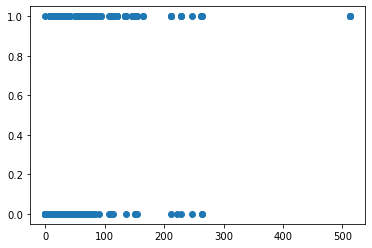

In [38]:
plt.scatter('fare', 'survived', data = titanic)

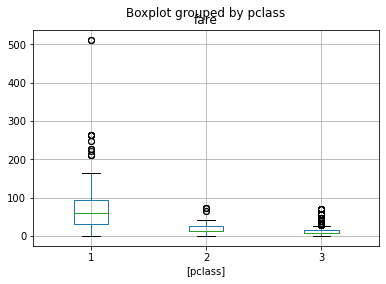

In [25]:
boxplot = titanic[['fare','pclass']].boxplot(by='pclass',return_type='dict' )

### Task 3

1. Read up the basics of boxplots: https://en.wikipedia.org/wiki/Box_plot, in particular the paragraph explaining the **whiskers**.
2. (**MC**) What are the exact values of the lower and upper whiskers (of fare) for the pclass2 passengers? 
    * **A** $[0, 41.6]$
    * **B** $[0, 45.5]$
    * **C** $[-6.5, 45.5]$
    * **D** $[0, 46.1]$


Recall the Wikipedia definition:<br><br>*From above the upper quartile, a distance of 1.5 times the IQR is measured out and a whisker is drawn up to the largest observed point from the dataset that falls within this distance. Similarly, a distance of 1.5 times the IQR is measured out below the lower quartile and a whisker is drawn up to the lower observed point from the dataset that falls within this distance.*

In [10]:
titanic[['fare','pclass']].groupby('pclass').describe()

fare                                                              
        count       mean        std  min       25%      50%   75%       max
pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500

pclass
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
3    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

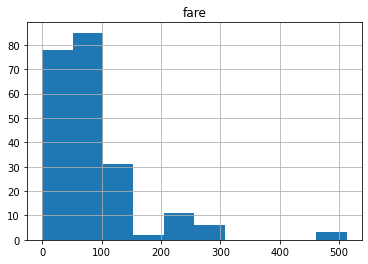

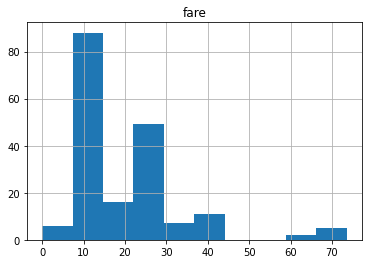

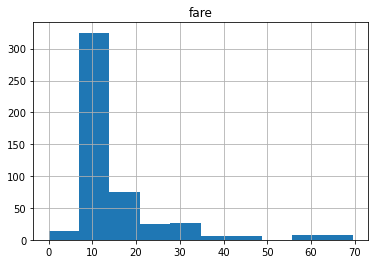

In [11]:
titanic[['fare','pclass']].groupby('pclass').hist()

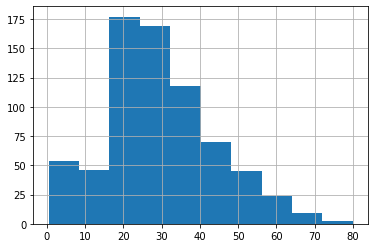

In [12]:
titanic['age'].hist()

### Explore Auto Data

In [41]:
df = pd.read_csv('../data/Auto.csv')
df.head()
#df.info()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,Manufacturer
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,ford


### Tasks

1. Compute the mean mpg of all cars.
2. Plot a histogram of mpg
3. Compute the mean mpg grouped by cylinder.
4. Create a boxplot of mpg vs. cylinder
5. Find the median and lower/upper quartiles
6. Scatterplot mpg vs. weight

In [14]:
df.mean()
df["mpg"].mean()
df.iloc[:,0].mean()
#a=df["mpg"]
np.mean(df["mpg"])
#pd.Dataframe() .mean()

23.44591836734694

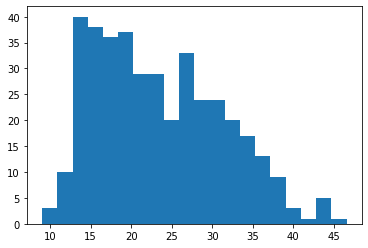

In [15]:
#2. Plot a histogram of mpg
plt.hist(df["mpg"], 20)
plt.show()

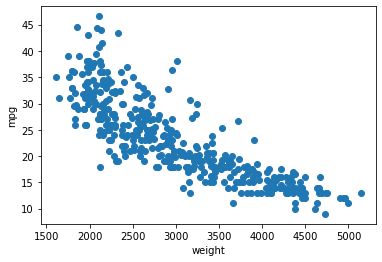

In [42]:
#scatterplot
plt.scatter("weight", "mpg",data=df)
plt.xlabel("weight")
plt.ylabel("mpg")
plt.show()

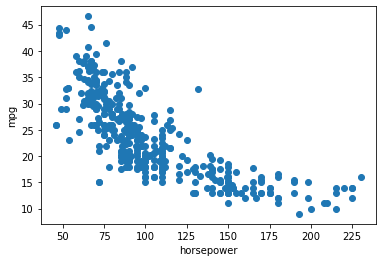

In [43]:
plt.scatter("horsepower", "mpg",data=df)
plt.xlabel("horsepower")
plt.ylabel("mpg")
plt.show()

### Tasks

1. Create two random (normally distibuted) vectors x1 and x2 of length 500
2. Compute their individual stdevs
3. Create 2 new variables: (i) xs: the sum of x1 and x2 and (ii) xm: the mean of x1 and x2
4. Compute the stdevs of xs and xm

In [19]:
from numpy.random import randn 
np.random.seed(123)

x1=randn(500)
x2=randn(500)
x1[0:5]
print(np.std(x1), np.std(x2) )

xs=x1+x2
xm=(x1+x2)/2

print(np.std(xs), np.std(xm) )


1.0032028561568238 0.9983655274978708
1.4220961462939055 0.7110480731469527
